In [1]:
import os
import glob
from collections import Counter
import cv2
import matplotlib.pyplot as plt

DATADIR_WITH = "data/with_signal"
DATADIR_WITHOUT = "data/without_signal"

In [2]:
def collect_image_stats(directory):
    dimensions = []
    failed = []

    pattern = os.path.join(directory, "*.png")
    for filepath in glob.glob(pattern):
        img = cv2.imread(filepath)
        if img is None:
            failed.append(filepath)
            continue

        h, w = img.shape[:2]
        dimensions.append((w, h))
        if h < 100 or w < 100:
            print(f"Unusually small image: {filepath} with size {w}x{h}")
            continue

    return dimensions, failed

In [3]:
dims_with, failed_with = collect_image_stats(DATADIR_WITH)
dims_without, failed_without = collect_image_stats(DATADIR_WITHOUT)

print(f"With-signal images: {len(dims_with)} opened, {len(failed_with)} failed.")
print(f"Without-signal images: {len(dims_without)} opened, {len(failed_without)} failed.")

if failed_with:
    print("\nSample failed (with_signal):")
    for f in failed_with[:10]:
        print("  ", f)

if failed_without:
    print("\nSample failed (without_signal):")
    for f in failed_without[:10]:
        print("  ", f)

With-signal images: 39979 opened, 0 failed.
Without-signal images: 39173 opened, 0 failed.


Most common dimensions (width, height) and their counts:
(200, 750): 79152


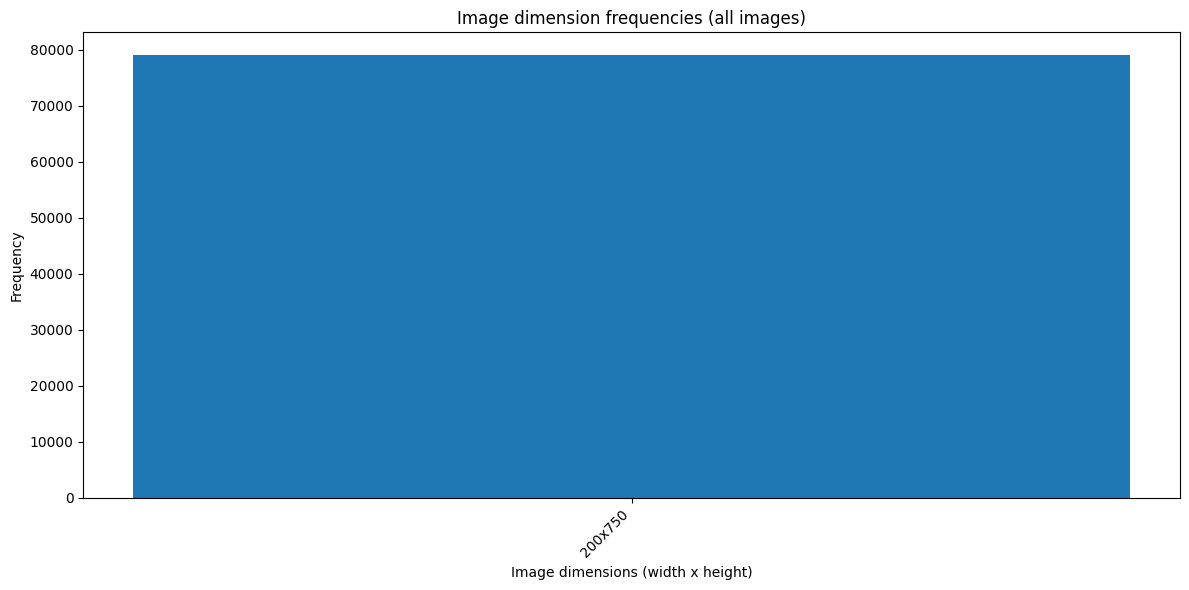

In [4]:
all_dims = dims_with + dims_without
dim_counts = Counter(all_dims)

print("Most common dimensions (width, height) and their counts:")
for dim, count in dim_counts.most_common(20):
    print(f"{dim}: {count}")

# Prepare data for plotting
labels = [f"{w}x{h}" for (w, h), _ in dim_counts.most_common()]
counts = [count for _, count in dim_counts.most_common()]

plt.figure(figsize=(12, 6))
plt.bar(range(len(labels)), counts)
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.ylabel("Frequency")
plt.xlabel("Image dimensions (width x height)")
plt.title("Image dimension frequencies (all images)")
plt.tight_layout()
plt.show()

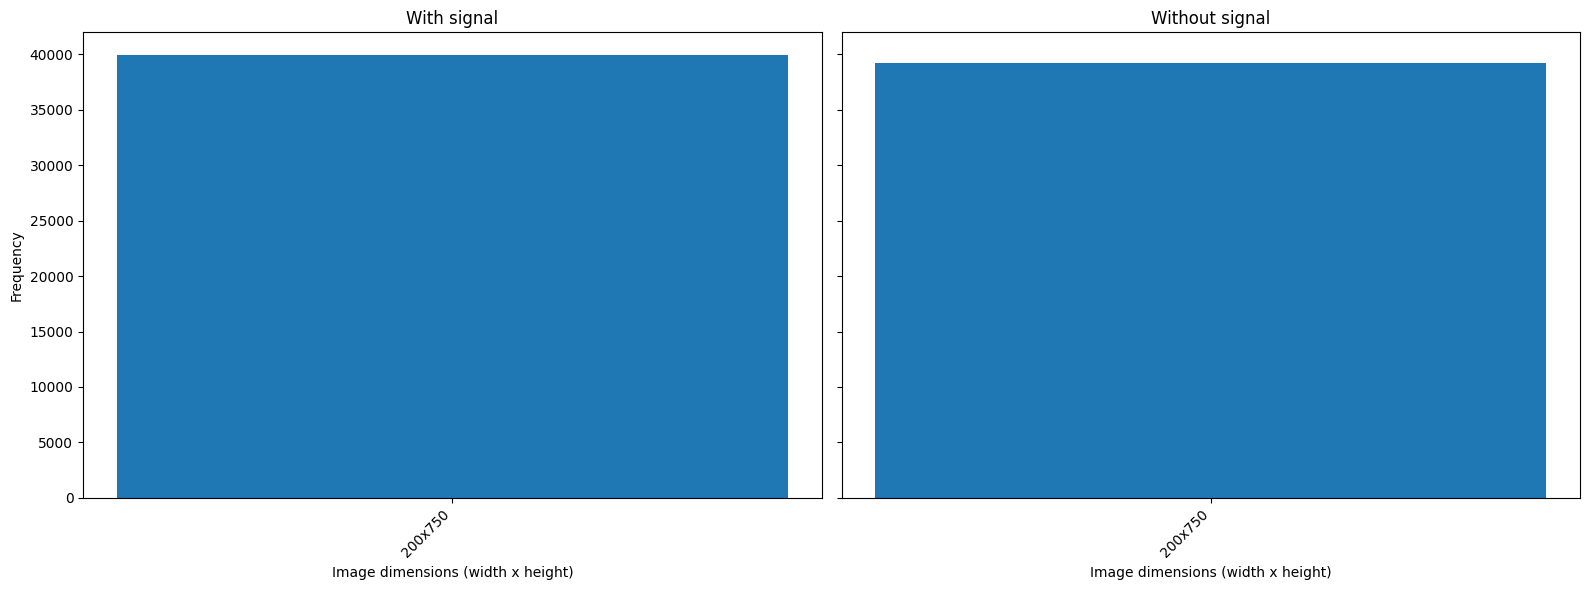

In [5]:
counts_with = Counter(dims_with)
counts_without = Counter(dims_without)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for ax, counts, title in [
    (axes[0], counts_with, "With signal"),
    (axes[1], counts_without, "Without signal"),
]:
    labels = [f"{w}x{h}" for (w, h), _ in counts.most_common()]
    freqs = [c for _, c in counts.most_common()]

    ax.bar(range(len(labels)), freqs)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_xlabel("Image dimensions (width x height)")
    ax.set_title(title)

axes[0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

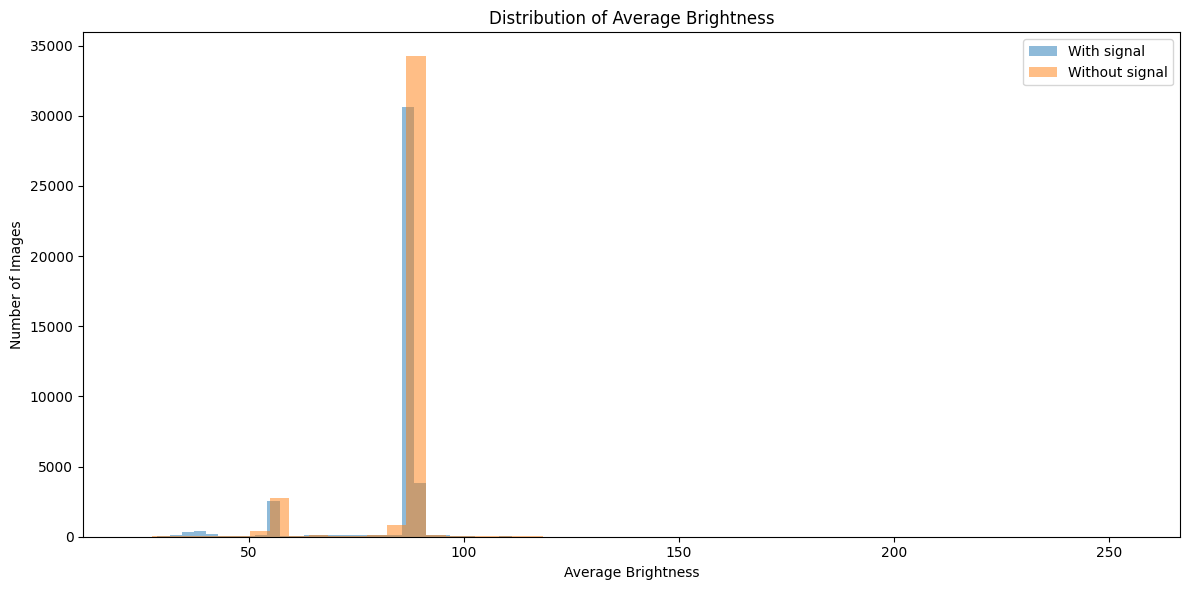

In [6]:
def compute_brightness_distribution(directory):
    brightness_values = []

    pattern = os.path.join(directory, "*.png")
    for filepath in glob.glob(pattern):
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        avg_brightness = img.mean()
        brightness_values.append(avg_brightness)

    return brightness_values

brightness_with = compute_brightness_distribution(DATADIR_WITH)
brightness_without = compute_brightness_distribution(DATADIR_WITHOUT)
plt.figure(figsize=(12, 6))
plt.hist(brightness_with, bins=50, alpha=0.5, label="With signal")
plt.hist(brightness_without, bins=50, alpha=0.5, label="Without signal")
plt.xlabel("Average Brightness")
plt.ylabel("Number of Images")
plt.title("Distribution of Average Brightness")
plt.legend()
plt.tight_layout()
plt.show()